# The k-Nearest Neighbors Algorithm

## Introduction

The k-Nearest Neighbors (k-NN) algorithm is a popular and versatile machine learning method used for both classification and regression tasks. It is an instance-based learning approach that relies on the principle of similarity: it assumes that similar data points tend to have similar outcomes. k-NN is a non-parametric and lazy learning algorithm, meaning it makes predictions based on the closest data points in the training set.

### k-NN Algorithm

The k-Nearest Neighbors algorithm can be summarized as follows:

- **Initialization**: Start with a labeled training dataset and a new, unlabeled data point for prediction.
- **Distance Calculation**: Calculate the distance between the new data point and every data point in the training set using a distance metric (e.g., Euclidean distance).
- **k-Nearest Neighbors Selection**: Select the k data points from the training set that are closest to the new data point based on distance.
- **Majority Voting (Classification)**: For classification tasks, predict the class label of the new data point by majority voting among its k-nearest neighbors.
- **Mean Value (Regression)**: For regression tasks, predict the numerical value of the new data point as the mean of the target values of its k-nearest neighbors.

## Advantages and Disadvantages

### Advantages

- **Simplicity**: k-NN is easy to understand and implement, making it a valuable tool for both beginners and experienced practitioners.
- **No Model Training**: As a lazy learner, k-NN does not require a separate training phase, making it suitable for dynamic or changing datasets.
- **Versatility**: It can be used for classification, regression, and even anomaly detection tasks.
- **Adaptability**: k-NN can adapt to different data distributions and non-linear relationships.

### Disadvantages

- **Computational Intensity**: Calculating distances for each prediction can be computationally expensive for large datasets.
- **Sensitivity to k**: The choice of the hyperparameter k (number of neighbors) can significantly impact the model's performance.
- **Need for Feature Scaling**: Proper feature scaling is essential, as k-NN is sensitive to the scale of features.
- **Curse of Dimensionality**: In high-dimensional spaces, k-NN may struggle due to the increased computational demands and the dilution of data density.

## Illustration

Here's a graph illustrating the k-Nearest Neighbors (k-NN) algorithm. In this example:

- Red and blue points represent two different classes.
- The green point is a new data point that we want to classify.
- The algorithm finds the nearest neighbors of this new point (shown in purple with yellow edges).
- The class of the new point is determined based on the majority class of its nearest neighbors.
- In this case, the k-NN algorithm considers the 3 nearest neighbors to classify the new point.



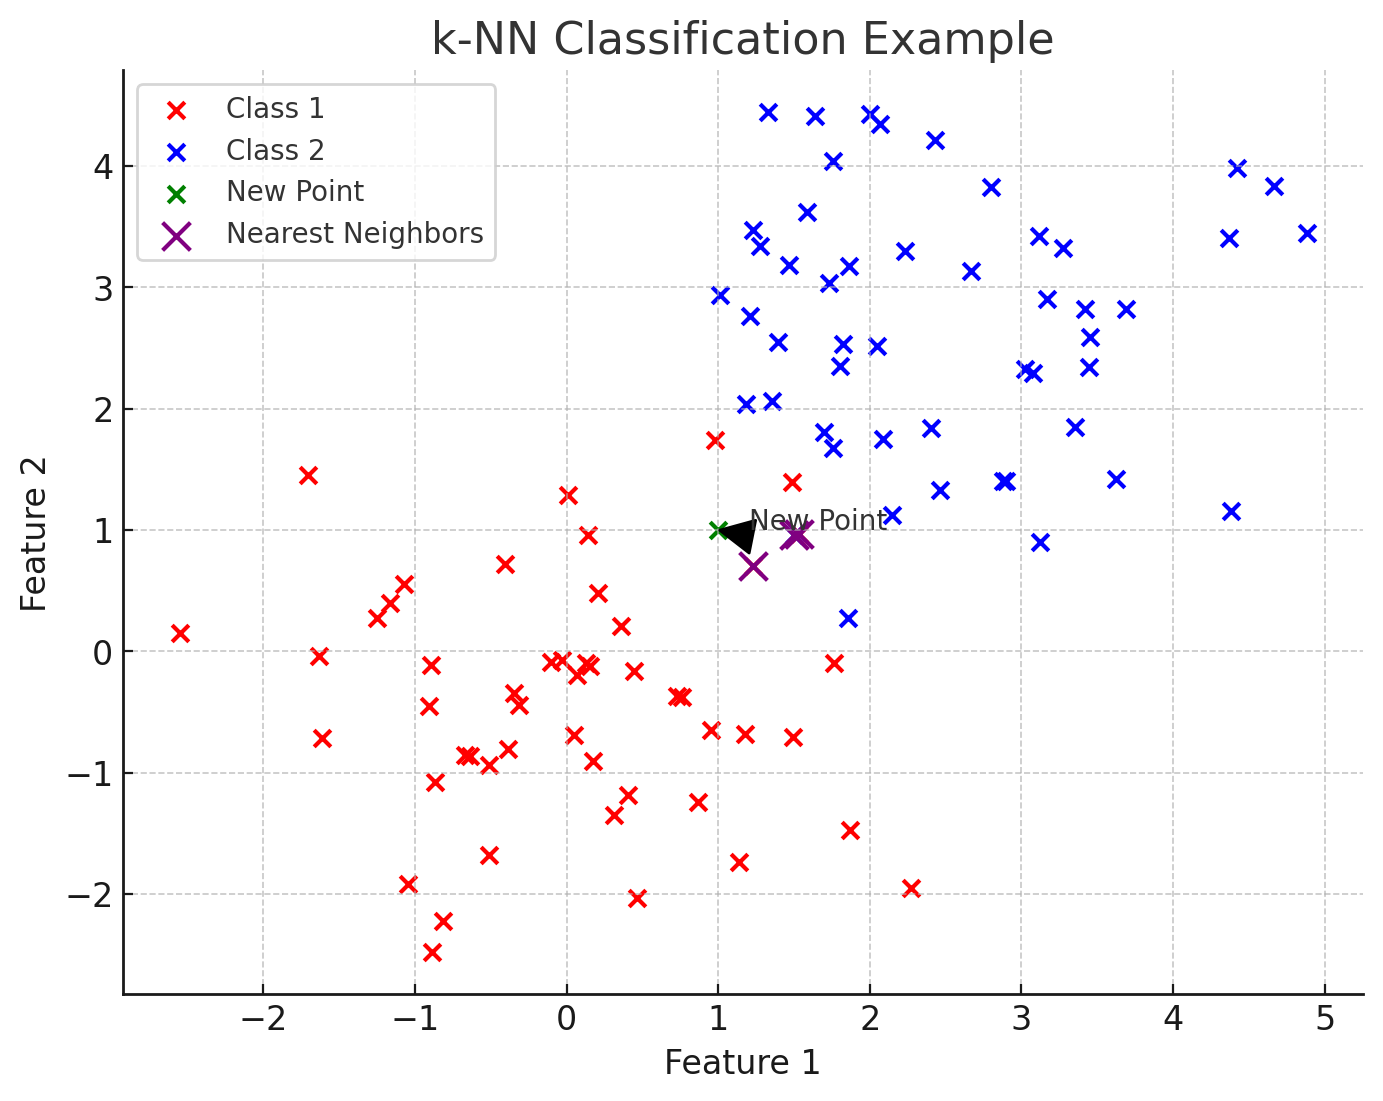

## Dataset

The dataset we're using is the Swiss Roll dataset.

The Swiss Roll dataset is a popular synthetic dataset often used in the context of manifold learning and regression tasks. It is a three-dimensional dataset that resembles a rolled-up sheet or pastry, hence the name "Swiss Roll." The dataset is valuable for demonstrating algorithms that are sensitive to the ordering of data points within a manifold or those that can exploit the lower-dimensional structure that underlies a higher-dimensional space.

### Characteristics of the Swiss Roll:

- **Three-Dimensional**: Data points in the Swiss Roll dataset are distributed across three dimensions, allowing for complex interactions between the variables that are not easily captured in lower-dimensional spaces.

- **Non-Linear Manifold**: The structure of the Swiss Roll is inherently non-linear, making it an excellent test case for algorithms that aim to uncover non-linear relationships within the data.

- **Continuous Values**: The Swiss Roll provides continuous values across its dimensions, which can be used for regression tasks or to study continuous feature interactions.

- **Manifold Unfolding**: Algorithms such as t-SNE or MDS (Multidimensional Scaling) use the Swiss Roll to demonstrate their ability to unfold the manifold into a lower-dimensional space while preserving the relationships between points.

### Usage:

When using the Swiss Roll for classification tasks, it's common to discretize the continuous target variable into categorical labels. This involves creating a binary or multi-class target by dividing the continuous variable based on specific thresholds or quantiles.

In manifold learning, the Swiss Roll is utilized to demonstrate the effectiveness of dimensionality reduction techniques. It serves as an example where simply flattening the data into two dimensions (such as using PCA) would not capture the intrinsic geometry of the data manifold.

In summary, the Swiss Roll dataset provides a challenging and visually intuitive example for various machine learning tasks, particularly for illustrating the capabilities of algorithms in understanding complex, non-linear data structures.


Classification report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75       238
           1       0.73      0.61      0.67       212

    accuracy                           0.71       450
   macro avg       0.72      0.71      0.71       450
weighted avg       0.72      0.71      0.71       450

Confusion matrix:
 [[191  47]
 [ 82 130]]
Accuracy score: 0.7133333333333334


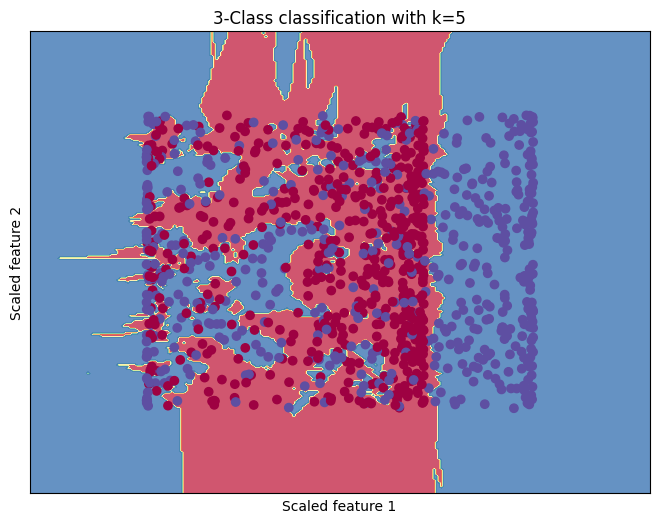

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Generate the dataset
X, y = datasets.make_swiss_roll(n_samples=1500)

# Swiss roll is a 3D dataset, but k-NN needs a 2D dataset. We'll use the first two dimensions.
X = X[:, :2]

# Discretize the continuous target into two classes
threshold = y.mean()
y = (y > threshold).astype(int)  # Convert to 0 or 1

# 2. Preprocess the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Implement k-Nearest Neighbors
k = 5  # Choose the number of neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=k)

# 5. Train the model on the training data
knn.fit(X_train, y_train)

# 6. Test the model on the testing data
y_pred = knn.predict(X_test)

# 7. Evaluate the model performance
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

# Visualization of the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.xlabel('Scaled feature 1')
plt.ylabel('Scaled feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(f'3-Class classification with k={k}')
plt.show()


### Accuracy Rate vs. K Value

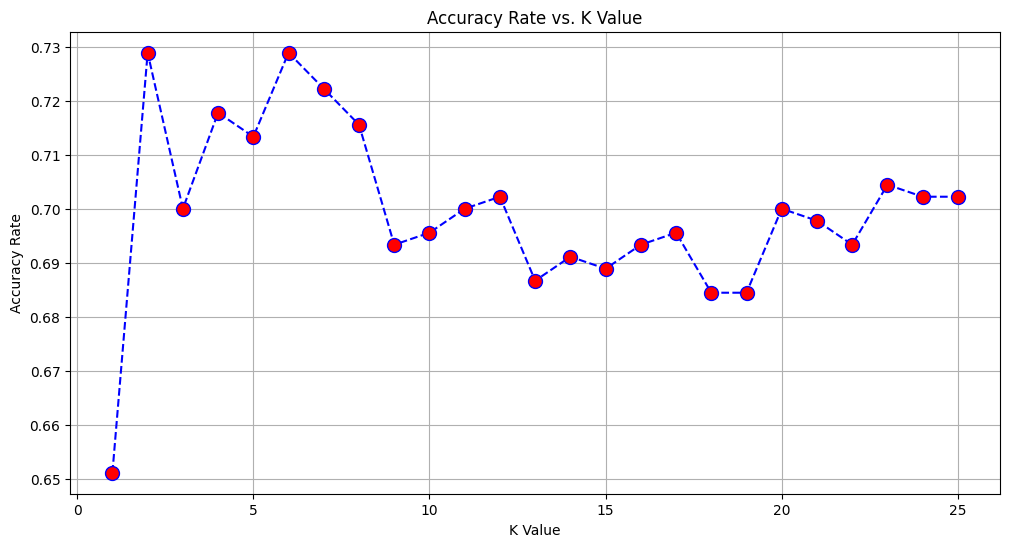

In [8]:
# Set the range of k
k_range = range(1, 26)

# List to store the average accuracy for each value of k
accuracy_scores = []

# Loop over the range of k values
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot error rate vs. k
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracy_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.grid()
plt.show()

### Error Rate vs K Value

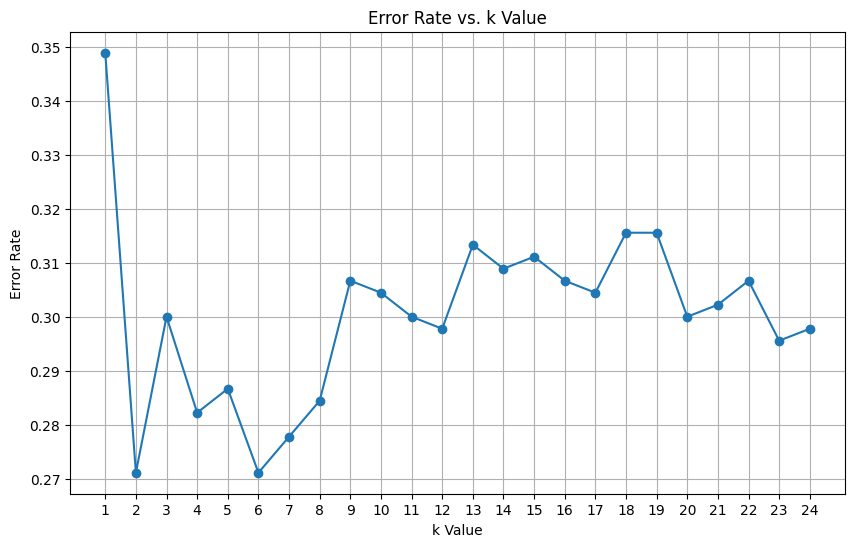

In [7]:
# Range of k to try
k_values = range(1, 25)
errors = []

# Try each value of k
for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

# Plot the error rate vs k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid()
plt.show()

## Model Evaluation and Analysis

### Classification Report

Classification report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75       238
           1       0.73      0.61      0.67       212

    accuracy                           0.71       450
   macro avg       0.72      0.71      0.71       450
weighted avg       0.72      0.71      0.71       450

The classification report provides a breakdown of the precision, recall, and f1-score for each class, as well as overall accuracy and weighted averages. Precision measures the ability of the classifier not to label a negative sample as positive, while recall measures the ability of the classifier to find all positive samples. The f1-score provides a balance between precision and recall.

From the classification report, we can observe that:
- Class 0 has a higher recall compared to precision, indicating that it has a higher true positive rate but also more false positives.
- Class 1, conversely, has a higher precision than recall, suggesting that while it's more conservative at labeling positive samples, it misses more true positives.

### Confusion Matrix

Confusion matrix:
 [[191  47]
 [ 82 130]]

The confusion matrix provides a tabular summary of the number of correct and incorrect predictions made by the classifier. The matrix shows:
- 191 true positives and 130 true negatives.
- 47 false positives (Type I error) and 82 false negatives (Type II error).

### Accuracy Score
Accuracy score: 0.7133333333333334.

The accuracy score indicates the proportion of the total number of predictions that were correct. An accuracy of approximately 71.33% was achieved by the model.

### Plot Interpretation
The plot showcases the classification landscape after applying the k-NN algorithm. The different background colors represent the decision regions for each class, while the colored points represent the actual labels from the test dataset. It is evident that:
- There are regions where the classifier has clear confidence in its predictions (homogeneous color areas).
- There are also regions where the decision boundary is not as clear-cut, indicating areas where the classifier may be more likely to make errors.

Overall, the model demonstrates reasonable performance, but there is room for improvement, particularly in reducing the number of false negatives and false positives to enhance precision and recall.


## Choosing the Right Value for K

When implementing the k-Nearest Neighbors algorithm, the choice of 'k' is pivotal to the model's performance. 'k' determines the number of neighbors considered when making a prediction, and thus directly influences the classification accuracy and the generalization ability of the model.

### Factors Influencing the Choice of K

1. **Noise in the Data**: A smaller 'k' value can be sensitive to noise in the data, while a larger 'k' can smooth out the effects of noise.
2. **Decision Boundaries**: A smaller 'k' results in more complex decision boundaries, potentially leading to overfitting. A larger 'k' simplifies the decision boundaries, which can reduce overfitting but might increase bias.
3. **Dataset Size**: For larger datasets, a larger 'k' might be necessary to capture enough information in the neighborhood.

### Methods to Determine the Best K

- **Cross-Validation**: Use cross-validation to test the model's performance with different 'k' values. Choose the 'k' that yields the best validation accuracy.
- **Error Rate vs. K Plot**: Plot the model's error rate against different 'k' values. The 'k' at which the error rate stabilizes or minimizes is often a good choice.
- **Elbow Method**: Similar to the above, but look for a 'k' where an increase in 'k' doesn't lead to significant improvement in performance – the "elbow" point.

### Our Approach

In our case, we evaluated the model with various 'k' values and observed the performance metrics. We plotted the error rate against the 'k' values and looked for the value where the error rate started to diminish at a diminishing rate. This point often represents a balance between underfitting and overfitting.

We also considered the complexity of the decision boundaries in our dataset. Given the intricate structure in the Swiss roll dataset, choosing an appropriate 'k' was crucial. The 'k' value needed to be large enough to capture the data's curvature but not so large as to oversimplify the model.

Ultimately, the 'k' value that resulted in the highest accuracy and balanced precision and recall metrics was selected for our final model.

### Conclusion

Choosing the right 'k' is a delicate balance and is often specific to the dataset and problem at hand. Through iterative testing and validation, one can arrive at an optimal 'k' that offers a robust, accurate, and generalizable model.


# Recommender Systems with k-Nearest Neighbors

Recommender systems, also known as recommendation systems or recommendation engines, play a crucial role in helping users discover relevant items, such as movies, books, products, or content, based on their preferences and historical interactions. One approach to building such systems is to leverage the power of k-Nearest Neighbors (k-NN). k-NN-based recommender systems rely on the idea of finding users or items that are most similar to the target user or item. By identifying the k-nearest neighbors in terms of user preferences or item characteristics, these systems make recommendations based on the behaviors and preferences of similar users. k-NN-based recommender systems can be implemented for various types of recommendation tasks, including collaborative filtering, content-based filtering, and hybrid approaches, making them versatile tools for personalizing user experiences and enhancing engagement.


#### Spotify 2023 Most Streamed Song Dataset

The Spotify 2023 Most Streamed Song dataset is a valuable resource for exploring and analyzing trends in music consumption on the popular streaming platform.

This dataset provides detailed information about the most streamed songs in 2023, including attributes such as track name, artist(s), release date, streaming statistics, audio features, and more. It offers insights into the popularity and characteristics of songs that resonated with listeners during that year.

With a wide range of data points, this dataset enables us to perform various analyses, build recommendation systems, and gain a deeper understanding of the music preferences and trends of Spotify users in 2023.


In [32]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Load the dataset (this would be your Spotify dataset)
spotify_df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spotify_df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [36]:
spotify_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'key_A', 'key_A#',
       'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#', 'mode_Major', 'mode_Minor'],
      dtype='object')

In [37]:
spotify_df.set_index("track_name", drop = False, inplace = True)
spotify_df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,0,0,0,0,0,0,0,0,1,0
LALA,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,1,0,0,0,0,0,0,0,1,0
vampire,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,0,0,0,0,1,0,0,0,1,0
Cruel Summer,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,0,0,0,0,0,0,0,0,1,0
WHERE SHE GOES,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,0,0,0,0,0,0,0,0,0,1


In [39]:
spotify_df.loc['As It Was']

track_name                 As It Was
artist(s)_name          Harry Styles
artist_count                       1
released_year                   2022
released_month                     3
released_day                      31
in_spotify_playlists           23575
in_spotify_charts                130
streams                   2513188493
in_apple_playlists               403
in_apple_charts                  198
in_deezer_playlists              863
in_deezer_charts                  46
in_shazam_charts                 NaN
bpm                              174
danceability_%                    52
valence_%                         66
energy_%                          73
acousticness_%                    34
instrumentalness_%                 0
liveness_%                        31
speechiness_%                      6
key_A                              0
key_A#                             0
key_B                              0
key_C#                             0
key_D                              0
k

In [33]:


# One-hot encode the 'key' and 'mode' features
spotify_df = pd.get_dummies(spotify_df, columns=['key', 'mode'])

# Selecting relevant numeric features for the recommendation
features = [
    'bpm',
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%'
] + [col for col in spotify_df.columns if 'key_' in col or 'mode_' in col]


# Prepare the features DataFrame
X = spotify_df[features]

# Initialize the KNN model
knn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

# Fit the model
knn.fit(X)

# Function to find k nearest neighbors
def find_similar_songs(track_name, X, knn_model, k=5):
    # Find the feature vector for the provided track name
    track_vector = X.loc[spotify_df['track_name'] == track_name].values

    # Find the k-neighbors of this track
    distances, indices = knn_model.kneighbors(track_vector, n_neighbors=k+1)

    # Indices are the positions in the dataframe of the neighbors
    # Skipping the first one since it is the query song itself
    neighbor_indices = indices[0][1:]

    # Return the neighbor tracks' names
    return spotify_df['track_name'].iloc[neighbor_indices].tolist(), distances[0][1:]

# Example usage:
# Provide the name of a track to find similar tracks
track_name = "As It Was"

similar_tracks, _ = find_similar_songs(track_name, X, knn, k=5)

print(f"TOP 5 Tracks similar to '{track_name}':")
for track in similar_tracks:
    print(track)

track_name = "I Wanna Be Yours"
similar_tracks, _ = find_similar_songs(track_name, X, knn, k=5)

print(f"TOP 5 Tracks similar to '{track_name}':")
for track in similar_tracks:
    print(track)

TOP 5 Tracks similar to 'As It Was':
TULUM
POLARIS - Remix
Dark Red
good 4 u
Nosso Quadro
TOP 5 Tracks similar to 'I Wanna Be Yours':
Die For You
Satellite
Viva La Vida
Snooze
Come Back Home - From "Purple Hearts"


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
